In [10]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray
from skimage import data, exposure
from skimage import filters
import matplotlib.pyplot as plt
import tensorflow as tf
import imutils
from keras.models import load_model
import keras.api._v2.keras as keras
from keras import utils
from imutils.contours import sort_contours
import numpy as np
import argparse
import cv2
import os
import pandas as pd


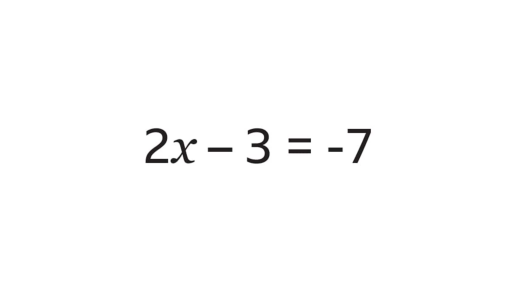

In [11]:
image = imread("samp_data/test1.jpg")

# Image processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
edged = cv2.Canny(blurred, 30, 150)

# Find image contours
cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sorted_cnts = sort_contours(cnts, method="left-to-right")[0]

# Store each contour as a tuple (center, size, angle) in an array
full_contours = []
tuple_lst = ()
for cnt in sorted_cnts:
    center, size, angle = cv2.minAreaRect(cnt)
    tuple = (center, size, angle)
    tuple_lst = tuple_lst + cv2.minAreaRect(cnt)
    full_contours.append(tuple)
plt.axis("off")
plt.imshow(image)


In [3]:
output = []
# for contour in sorted_cnts:
#             x, y, w, h = cv2.boundingRect(contour)
#             area = cv2.contourArea(contour)
#             hull = cv2.convexHull(contour)
#             # solid = 100 * area / cv2.contourArea(hull)
#             ratio = (float)(w) / h
#             output.append(contour)

for out in sorted_cnts:
  output.append(np.int0(cv2.boxPoints(cv2.minAreaRect(out))))



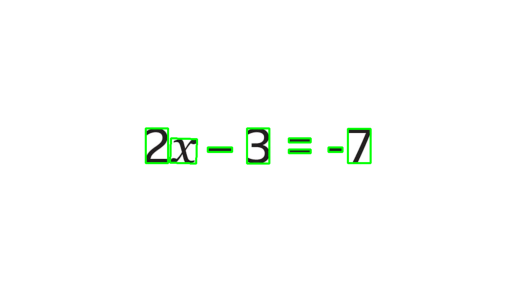

In [4]:
cv2.drawContours(image, output, -1, (0, 255, 0), 3)
plt.axis("off")
plt.imshow(image)
